# AutoML using H2O
Import the h2o Python module and H2OAutoML class and initialize a local H2O cluster.

In [79]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 9 hours 47 mins
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,29 days
H2O cluster name:,H2O_from_python_madhuridilipkumar_bokjnb
H2O cluster total nodes:,1
H2O cluster free memory:,1.398 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [80]:
# Use local data file 
import os

data_path = "/Users/madhuridilipkumar/Desktop/DM_project/movie.csv"


# Load data into H2O
hf = h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [81]:
hf.describe()

Rows:3596
Cols:28




,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
type,enum,enum,int,int,int,int,enum,int,int,enum,enum,string,int,int,enum,int,string,string,int,enum,enum,enum,int,int,int,real,real,int
mins,,,1.0,7.0,0.0,0.0,,0.0,162.0,,,NaN,5.0,0.0,,0.0,NaN,NaN,1.0,,,,218.0,2000.0,0.0,1.6,1.33,0.0
mean,,,164.14221472737492,106.34402901785714,560.8439933259177,724.2296089385475,,7203.726386179996,48848305.844299674,,,NaN,84693.34232480534,10659.144048943272,,1.4386160714285716,NaN,NaN,284.61184026808155,,,,44804427.22140448,2008.1162402669634,1845.0722253206916,6.31198553948832,2.1805031636034946,9433.835094549502
maxs,,,813.0,300.0,23000.0,23000.0,,640000.0,760505847.0,,,NaN,1676169.0,656730.0,,43.0,NaN,NaN,5060.0,,,,12215500000.0,2016.0,137000.0,9.1,16.0,349000.0
sigma,,,131.13624463982757,20.115940890979562,2528.838736799954,1890.7079457854784,,16925.49533034773,70884486.33028735,,,NaN,133012.20190137826,20318.83768590337,,2.1403774460171747,NaN,NaN,393.4889081007449,,,,237461634.0653688,4.658263525528673,4433.289052021184,1.1137593649516664,0.8730007314946014,22052.65494698153
zeros,,,0,0,631,75,,23,0,,,0,0,30,,1521,0,0,0,,,,0,0,48,0,0,1471
missing,14,0,38,12,0,16,10,7,526,0,7,0,0,0,16,12,139,0,15,5,1,238,335,0,10,0,277,0
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,AvatarÂ,886204.0,4834.0,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's EndÂ,471220.0,48350.0,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,SpectreÂ,275868.0,11700.0,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0


In [82]:
y = "gross"
x = hf.columns
x.remove("gross")

# AutoML

Run AutoML, stopping after 10 models. The max_models argument specifies the number of individual (or "base") models, and does not include the two ensemble models that are trained at the end.

In [83]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = hf)

AutoML progress: |████████████████████████████████████████████████████████| 100%


# Leaderboard


Next, we will view the AutoML Leaderboard. Since we did not specify a leaderboard_frame in the H2OAutoML.train() method for scoring and ranking the models, the AutoML leaderboard uses cross-validation metrics to rank the models.

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric. In the case of binary classification, the default ranking metric is Area Under the ROC Curve (AUC). In the future, the user will be able to specify any of the H2O metrics so that different metrics can be used to generate rankings on the leaderboard.

The leader model is stored at aml.leader and the leaderboard is stored at aml.leaderboard.

In [84]:
lb = aml.leaderboard

In [85]:
aml.leaderboard.head()


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
XRT_1_AutoML_20181222_011454,1.35966e+15,3.68736e+07,1.35966e+15,2.18271e+07,1.88406
GBM_1_AutoML_20181222_011454,1.47328e+15,3.83834e+07,1.47328e+15,2.15028e+07,nan
GBM_2_AutoML_20181222_011454,1.49284e+15,3.86372e+07,1.49284e+15,2.15974e+07,nan
GBM_3_AutoML_20181222_011454,1.50825e+15,3.88361e+07,1.50825e+15,2.16292e+07,nan
GBM_4_AutoML_20181222_011454,1.51001e+15,3.88589e+07,1.51001e+15,2.14388e+07,nan
DeepLearning_1_AutoML_20181222_011454,1.60099e+15,4.00124e+07,1.60099e+15,2.52464e+07,nan
DRF_1_AutoML_20181222_011454,1.63437e+15,4.04273e+07,1.63437e+15,2.22624e+07,1.72738
GBM_5_AutoML_20181222_011454,1.73445e+15,4.16467e+07,1.73445e+15,2.38189e+07,nan
GBM_grid_1_AutoML_20181222_011454_model_1,4.8369e+15,6.95478e+07,4.8369e+15,4.5378e+07,2.80177
GLM_grid_1_AutoML_20181222_011454_model_1,5.00024e+15,7.07123e+07,5.00024e+15,4.62526e+07,2.81789


In [86]:
lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
XRT_1_AutoML_20181222_011454,1.35966e+15,3.68736e+07,1.35966e+15,2.18271e+07,1.88406
GBM_1_AutoML_20181222_011454,1.47328e+15,3.83834e+07,1.47328e+15,2.15028e+07,nan
GBM_2_AutoML_20181222_011454,1.49284e+15,3.86372e+07,1.49284e+15,2.15974e+07,nan
GBM_3_AutoML_20181222_011454,1.50825e+15,3.88361e+07,1.50825e+15,2.16292e+07,nan
GBM_4_AutoML_20181222_011454,1.51001e+15,3.88589e+07,1.51001e+15,2.14388e+07,nan
DeepLearning_1_AutoML_20181222_011454,1.60099e+15,4.00124e+07,1.60099e+15,2.52464e+07,nan
DRF_1_AutoML_20181222_011454,1.63437e+15,4.04273e+07,1.63437e+15,2.22624e+07,1.72738
GBM_5_AutoML_20181222_011454,1.73445e+15,4.16467e+07,1.73445e+15,2.38189e+07,nan
GBM_grid_1_AutoML_20181222_011454_model_1,4.8369e+15,6.95478e+07,4.8369e+15,4.5378e+07,2.80177
GLM_grid_1_AutoML_20181222_011454_model_1,5.00024e+15,7.07123e+07,5.00024e+15,4.62526e+07,2.81789


# Ensemble Exploration

To understand how the ensemble works, let's take a peek inside the Stacked Ensemble "All Models" model. The "All Models" ensemble is an ensemble of all of the individual models in the AutoML run. This is often the top performing model on the leaderboard.

In [87]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

In [88]:
metalearner.coef_norm()

{'Intercept': 48661986.79739269,
 'XRT_1_AutoML_20181222_011454': 0.09749876363510562,
 'GBM_1_AutoML_20181222_011454': 0.08798991915607253,
 'GBM_2_AutoML_20181222_011454': 0.08531349627639928,
 'GBM_3_AutoML_20181222_011454': 0.0832546751503546,
 'GBM_4_AutoML_20181222_011454': 0.08372885070385244,
 'DeepLearning_1_AutoML_20181222_011454': 0.05372053415089743,
 'DRF_1_AutoML_20181222_011454': 0.07021201874125398,
 'GBM_5_AutoML_20181222_011454': 0.03752947514858861,
 'GBM_grid_1_AutoML_20181222_011454_model_1': 0.017028650536849113,
 'GLM_grid_1_AutoML_20181222_011454_model_1': 0.0}

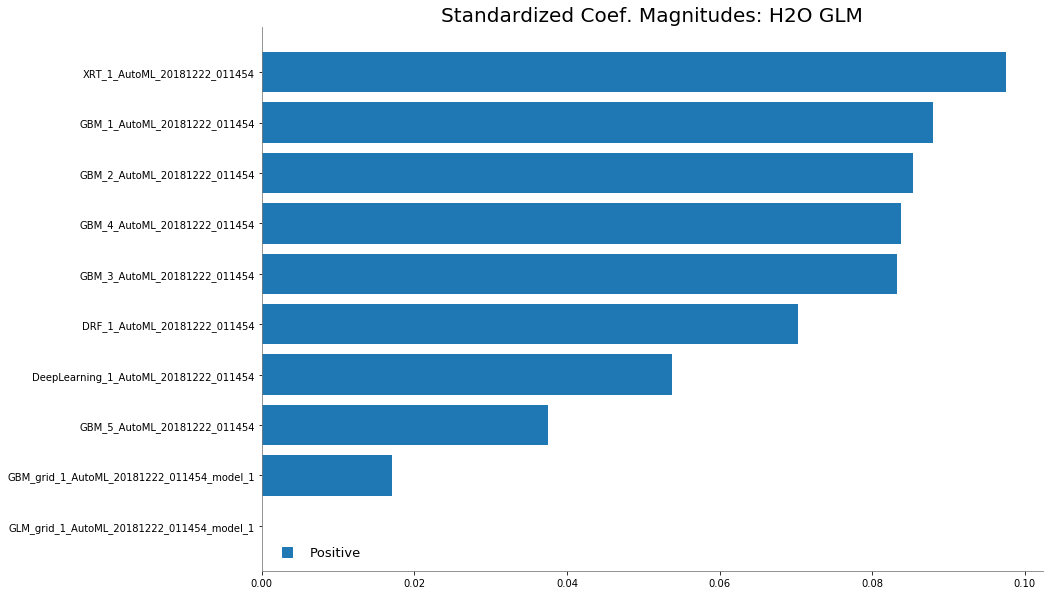

In [89]:
%matplotlib inline
metalearner.std_coef_plot()